In [63]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as pltac

In [64]:
data=np.array([[4.09, 8.06],
[4.08, 10.02],
[4.07, 12.01],
[12.51, 12.54],
[12.03 ,12.04],
[11.57 ,11.52],
[11.09 ,11.03],
[10.53 ,10.51],
[10.01 ,10.01],
[15.52 ,12.5],
[15.1 ,12.06],
[14.57, 11.55],
[14.3, 11.08],
[13.53, 10.52],
[13.008, 10.03],
[15.021, 4.01],
[14.031, 3.02],
[12.02, 2.99],
[10.04, 3.107],
[8.05, 3.08],
[7.03, 3.04],
[6.06, 4.01],
[5.06, 5.07],
[4.03, 6.02],
[5.03, 14.02],
[5.01, 16.05]])

In [65]:
m = data.shape[0]
n = data.shape[1]

In [66]:
n_iter = 100
K=3

In [67]:
centroids=np.array([]).reshape(n,0) 

In [68]:
for i in range(K):
    rand=rd.randint(0,m-1)
    centroids=np.c_[centroids,data[rand]]
centroids

array([[14.57 , 14.031, 10.04 ],
       [11.55 ,  3.02 ,  3.107]])

In [69]:
output = {}

In [75]:
dist=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((data-centroids[:,k])**2,axis=1)
    dist=np.c_[dist,tempDist]
C=np.argmin(dist,axis=1)+1

In [77]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],data[i]]
#print(Y)
     
for k in range(K):
    Y[k+1]=Y[k+1].T
# print(Y)
    
for k in range(K):
     centroids[:,k]=np.mean(Y[k+1],axis=0)

In [35]:
for i in range(n_iter):
    dist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((data-centroids[:,k])**2,axis=1)
        dist=np.c_[dist,tempDist]
    C=np.argmin(dist,axis=1)+1
    
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],data[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
        centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

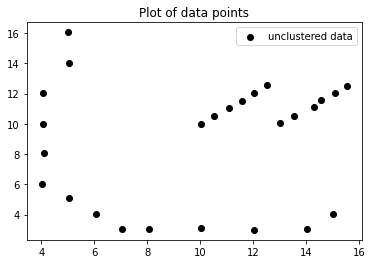

In [78]:
plt.scatter(data[:,0],data[:,1],c='black',label='unclustered data')
plt.legend()
plt.title('Plot of data points')
plt.show()

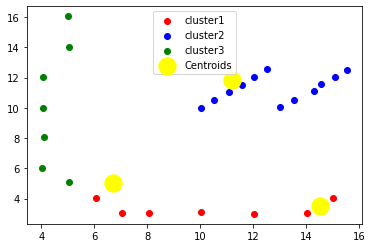

In [80]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()